In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
diabetese_dataset = pd.read_csv('/content/diabetes.csv')

In [ ]:
diabetese_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetese_dataset.shape

(768, 9)

In [ ]:
# Check the unique values in the last column (target column)
unique_values = diabetese_dataset['Outcome'].unique()
print("Unique target values:", unique_values)

Unique target values: [1 0]


In [ ]:
# Check data type and number of unique values in the target column
target = diabetese_dataset['Outcome']
print("Data type of target:", target.dtype)
print("Number of unique values:", target.nunique())

# Determine if classification or regression
if target.nunique() < 20 and target.dtype == 'object':
    print("This is a classification problem.")
else:
    print("This is a regression problem.")


Data type of target: int64
Number of unique values: 2
This is a regression problem.


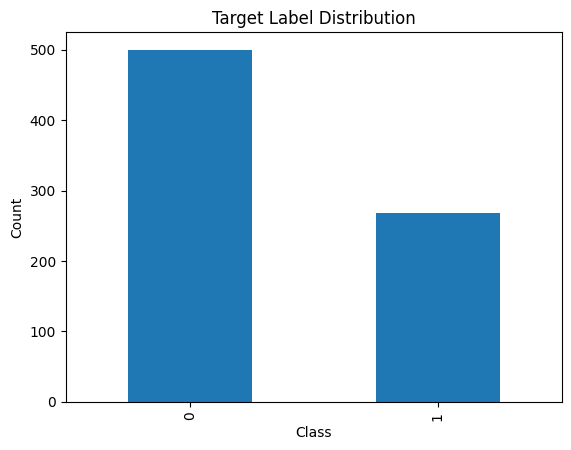

In [ ]:
# Plot the distribution of target labels
target.value_counts().plot(kind='bar')
plt.title("Target Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
diabetese_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetese_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# Separating the data and variables
X = diabetese_dataset.drop(columns='Outcome', axis = 1)
Y = diabetese_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Data Standardization
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
display(standardized_data)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# again we separate the data after standardization
X = standardized_data
Y = diabetese_dataset['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print("X= : ", X.shape, "\nX_train= : ", X_train.shape, "\nX_test= :", X_test.shape)

X= :  (768, 8) 
X_train= :  (614, 8) 
X_test= : (154, 8)


In [ ]:
# Training the model
classifier = svm.SVC(kernel='linear')

In [ ]:
# training the SVM
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Evaluating the model
X_train_prediction = classifier.predict(X_train)
training_data_accuracy =accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy Score of the Training data : ", training_data_accuracy)

Accuracy Score of the Training data :  0.7866449511400652


In [ ]:
X_test_prediction = classifier.predict(X_test)
tests_data_accuracy =accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy Score of the Test data : ", tests_data_accuracy)

Accuracy Score of the Test data :  0.7727272727272727


In [ ]:
# making the predictive system
# input_data = (4,110,92,0,0,37.6,0.191,30)
input_data = (1,189,60,23,846,30.1,0.398,59)
# convert to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person is not diabetic")
else :
  print("The Person is diabetic")

[[-0.84488505  2.13150675 -0.47073225  0.15453319  6.65283938 -0.24020459
  -0.2231152   2.19178518]]
[1]
The Person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
